In [1]:
import tabular_processing

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score, precision_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
df=df.sort_values(by="name",axis=0)

df.head(20)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [4]:
df.tail(20)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
175,phon_R01_S43_5,115.380,123.109,108.634,0.00332,0.00003,0.00160,0.00199,0.00480,0.01503,...,0.02436,0.00401,26.005,0,0.405991,0.761255,-5.966779,0.197938,1.974857,0.184067
176,phon_R01_S43_6,116.388,129.038,108.970,0.00346,0.00003,0.00169,0.00213,0.00507,0.01725,...,0.02623,0.00415,26.143,0,0.361232,0.763242,-6.016891,0.109256,2.004719,0.174429
177,phon_R01_S44_1,151.737,190.204,129.859,0.00314,0.00002,0.00135,0.00162,0.00406,0.01469,...,0.02184,0.00570,24.151,1,0.396610,0.745957,-6.486822,0.197919,2.449763,0.132703
178,phon_R01_S44_2,148.790,158.359,138.990,0.00309,0.00002,0.00152,0.00186,0.00456,0.01574,...,0.02518,0.00488,24.412,1,0.402591,0.762508,-6.311987,0.182459,2.251553,0.160306
179,phon_R01_S44_3,148.143,155.982,135.041,0.00392,0.00003,0.00204,0.00231,0.00612,0.01450,...,0.02175,0.00540,23.683,1,0.398499,0.778349,-5.711205,0.240875,2.845109,0.192730
180,phon_R01_S44_4,150.440,163.441,144.736,0.00396,0.00003,0.00206,0.00233,0.00619,0.02551,...,0.03964,0.00611,23.133,1,0.352396,0.759320,-6.261446,0.183218,2.264226,0.144105
181,phon_R01_S44_5,148.462,161.078,141.998,0.00397,0.00003,0.00202,0.00235,0.00605,0.01831,...,0.02849,0.00639,22.866,1,0.408598,0.768845,-5.704053,0.216204,2.679185,0.197710
182,phon_R01_S44_6,149.818,163.417,144.786,0.00336,0.00002,0.00174,0.00198,0.00521,0.02145,...,0.03464,0.00595,23.008,1,0.329577,0.757180,-6.277170,0.109397,2.209021,0.156368
183,phon_R01_S49_1,117.226,123.925,106.656,0.00417,0.00004,0.00186,0.00270,0.00558,0.01909,...,0.02592,0.00955,23.079,0,0.603515,0.669565,-5.619070,0.191576,2.027228,0.215724
184,phon_R01_S49_2,116.848,217.552,99.503,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,...,0.02429,0.01179,22.085,0,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404


In [5]:
def names(x):
    return x[:-2]
    
df["ID"] = df['name'].apply(lambda x: names(x))
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,ID
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,phon_R01_S01
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,phon_R01_S01
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,phon_R01_S01
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,phon_R01_S01
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,phon_R01_S01


In [6]:
len(df["ID"].unique())

32

In [7]:
#pd.DataFrame(df.groupby(by="ID")["MDVP:Fo(Hz)"].describe())
pd.DataFrame(df.groupby(by="ID").describe())

MDVP:Fo(Hz)                                                       \
                   count        mean        std      min        25%       50%   
ID                                                                              
phon_R01_S01         6.0  118.719333   2.614208  116.014  116.67750  118.3370   
phon_R01_S02         6.0   99.770333  11.904060   88.333   92.69200   95.3930   
phon_R01_S04         6.0  147.346167  11.846847  136.926  139.92150  143.1775   
phon_R01_S05         6.0  159.837667   8.865589  153.046  153.85600  155.1425   
phon_R01_S06         6.0  150.644667  24.094370  104.400  148.97325  158.9630   
phon_R01_S07         6.0  200.266833   2.397881  197.076  198.59425  200.3460   
phon_R01_S08         6.0  182.032500   4.661717  176.170  178.45650  182.1265   
phon_R01_S10         6.0  243.814333   5.056070  237.226  241.76600  243.1455   
phon_R01_S13         6.0  125.546333   2.834890  122.188  123.33425  125.3945   
phon_R01_S16         6.0  113.014000   3.763952  108.807  109.99925  112.6320   
phon_R01_S17         6.0  223.657833   7.755297  209.144  222.51825  226.0985   
phon_R01_S18         6.0  141.336667   4.409648  136.358  137.81200  141.5350   
phon_R01_S19         6.0  112.839667   3.660684  110.568  110.72850  111.4035   
phon_R01_S20         6.0   97.938333   2.577580   95.385   95.73025   97.4550   
phon_R01_S21         7.0  176.079000   4.777467  166.605  175.08950  176.8580   
phon_R01_S22         6.0  154.456000   4.287548  148.272  151.99750  154.7860   
phon_R01_S24         6.0  128.442500   5.412037  125.036  125.67850  126.1515   
phon_R01_S25         6.0  152.150167   2.085169  149.689  150.66450  151.9365   
phon_R01_S26         6.0  203.899167   6.246067  193.030  201.70150  205.4955   
phon_R01_S27         7.0  168.858857  27.324963  128.940  155.04550  170.7560   
phon_R01_S31         6.0  154.442333  17.516754  138.145  139.93600  150.7065   
phon_R01_S32         6.0  119.576167   0.703909  118.747  119.03725  119.5670   
phon_R01_S33         6.0  111.987333   3.257781  106.516  110.89950  112.7025   
phon_R01_S34         6.0  200.936500  17.323869  170.368  199.47950  202.6745   
phon_R01_S35         7.0  188.882143  10.712451  169.774  185.10750  188.6200   
phon_R01_S37         6.0  120.793000   3.185525  117.870  118.24725  120.2225   
phon_R01_S39         6.0  114.411167   8.198620  102.273  112.67200  114.3960   
phon_R01_S42         6.0  236.081333  20.780097  197.569  236.48075  238.8120   
phon_R01_S43         6.0  114.295500   2.405560  110.739  112.83900  114.5475   
phon_R01_S44         6.0  149.565000   1.370149  148.143  148.54400  149.3040   
phon_R01_S49         6.0  116.303500   0.921127  114.563  116.30000  116.4490   
phon_R01_S50         6.0  195.536500  17.244270  174.188  180.70700  200.2690   

                                 MDVP:Fhi(Hz)              ...        D2  \
                    75%      max        count        mean  ...       75%   
ID                                                         ...             
phon_R01_S01  120.41200  122.400          6.0  141.312833  ...  2.389730   
phon_R01_S02  104.43150  120.267          6.0  121.894333  ...  2.426422   
phon_R01_S04  150.68075  168.778          6.0  216.867500  ...  2.455692   
phon_R01_S05  165.04875  173.917          6.0  181.630167  ...  2.901752   
phon_R01_S06  163.38400  171.041          6.0  208.264333  ...  2.666557   
phon_R01_S07  202.06550  203.184          6.0  210.884333  ...  2.013296   
phon_R01_S08  185.63600  187.733          6.0  196.059833  ...  2.453447   
phon_R01_S10  244.99225  252.455          6.0  254.280500  ...  2.385541   
phon_R01_S13  127.58675  129.336          6.0  134.313167  ...  2.187770   
phon_R01_S16  116.37100  117.274          6.0  154.201333  ...  2.007679   
phon_R01_S17  228.93475  229.401          6.0  239.034500  ...  2.425983   
phon_R01_S18  143.33200  148.090          6.0  165.070500  ...  2.342869   
phon_R01_S19  112.66050  120.080     

In [8]:
num_cols = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE', "status"]

In [9]:
import numpy as np

In [10]:
patient_mean_df = pd.DataFrame(df.groupby(by="ID")[num_cols].mean())
patient_var_df = pd.DataFrame(df.groupby(by="ID")[num_cols].std())

In [11]:
patient_var_df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
ID,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01,2.614208,10.282701,15.259592,0.001621,1.366260e-05,0.000954,0.001165,0.002869,0.007958,0.076911,...,0.014757,0.003980,0.868639,0.016823,0.003962,0.361689,0.039775,0.100611,0.042173,0.0
phon_R01_S02,11.904060,10.360344,11.820384,0.001157,1.549193e-05,0.000657,0.000729,0.001974,0.005424,0.051535,...,0.008475,0.003368,2.343857,0.031138,0.014578,0.451212,0.075721,0.282696,0.042040,0.0
phon_R01_S04,11.846847,71.139173,21.702371,0.001664,8.944272e-06,0.000629,0.000918,0.001884,0.007336,0.086083,...,0.008701,0.009173,2.086773,0.077875,0.021246,1.261588,0.097243,0.356123,0.103264,0.0
phon_R01_S05,8.865589,11.671626,28.446404,0.001772,1.095445e-05,0.000924,0.000946,0.002773,0.006080,0.077378,...,0.009331,0.010382,2.134695,0.047315,0.014611,0.549366,0.058211,0.218004,0.053027,0.0
phon_R01_S06,24.094370,10.240252,2.262615,0.001491,1.505545e-05,0.000740,0.000833,0.002225,0.008071,0.085137,...,0.011390,0.007720,1.541056,0.057326,0.022136,0.607866,0.028844,0.328216,0.044629,0.0
phon_R01_S07,2.397881,2.737613,2.213086,0.000425,5.163978e-07,0.000281,0.000238,0.000845,0.001279,0.011290,...,0.002083,0.001005,2.256828,0.051899,0.001431,0.324519,0.005551,0.400881,0.019544,0.0
phon_R01_S08,4.661717,6.137444,5.428509,0.000571,4.082483e-06,0.000362,0.000349,0.001089,0.002703,0.023452,...,0.004894,0.001371,1.413696,0.038765,0.010383,0.412219,0.068307,0.093909,0.022349,0.0
phon_R01_S10,5.056070,6.369708,19.487316,0.000429,1.169045e-06,0.000293,0.000253,0.000879,0.002301,0.021541,...,0.004678,0.001307,1.498580,0.097529,0.008142,0.201006,0.042576,0.143473,0.010808,0.0
phon_R01_S13,2.834890,4.384057,3.266698,0.000389,5.477226e-06,0.000184,0.000169,0.000550,0.003484,0.032664,...,0.006493,0.001484,0.807530,0.060147,0.018112,0.234620,0.023532,0.205776,0.016929,0.0


In [12]:
patient_ids = list(patient_var_df.index)

In [13]:
patient_ids

['phon_R01_S01',
 'phon_R01_S02',
 'phon_R01_S04',
 'phon_R01_S05',
 'phon_R01_S06',
 'phon_R01_S07',
 'phon_R01_S08',
 'phon_R01_S10',
 'phon_R01_S13',
 'phon_R01_S16',
 'phon_R01_S17',
 'phon_R01_S18',
 'phon_R01_S19',
 'phon_R01_S20',
 'phon_R01_S21',
 'phon_R01_S22',
 'phon_R01_S24',
 'phon_R01_S25',
 'phon_R01_S26',
 'phon_R01_S27',
 'phon_R01_S31',
 'phon_R01_S32',
 'phon_R01_S33',
 'phon_R01_S34',
 'phon_R01_S35',
 'phon_R01_S37',
 'phon_R01_S39',
 'phon_R01_S42',
 'phon_R01_S43',
 'phon_R01_S44',
 'phon_R01_S49',
 'phon_R01_S50']

In [14]:
patient_var_df["status"] = patient_mean_df["status"]

In [15]:
patient_var_df.head(7)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
ID,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01,2.614208,10.282701,15.259592,0.001621,1.366260e-05,0.000954,0.001165,0.002869,0.007958,0.076911,...,0.014757,0.003980,0.868639,0.016823,0.003962,0.361689,0.039775,0.100611,0.042173,1.0
phon_R01_S02,11.904060,10.360344,11.820384,0.001157,1.549193e-05,0.000657,0.000729,0.001974,0.005424,0.051535,...,0.008475,0.003368,2.343857,0.031138,0.014578,0.451212,0.075721,0.282696,0.042040,1.0
phon_R01_S04,11.846847,71.139173,21.702371,0.001664,8.944272e-06,0.000629,0.000918,0.001884,0.007336,0.086083,...,0.008701,0.009173,2.086773,0.077875,0.021246,1.261588,0.097243,0.356123,0.103264,1.0
phon_R01_S05,8.865589,11.671626,28.446404,0.001772,1.095445e-05,0.000924,0.000946,0.002773,0.006080,0.077378,...,0.009331,0.010382,2.134695,0.047315,0.014611,0.549366,0.058211,0.218004,0.053027,1.0
phon_R01_S06,24.094370,10.240252,2.262615,0.001491,1.505545e-05,0.000740,0.000833,0.002225,0.008071,0.085137,...,0.011390,0.007720,1.541056,0.057326,0.022136,0.607866,0.028844,0.328216,0.044629,1.0
phon_R01_S07,2.397881,2.737613,2.213086,0.000425,5.163978e-07,0.000281,0.000238,0.000845,0.001279,0.011290,...,0.002083,0.001005,2.256828,0.051899,0.001431,0.324519,0.005551,0.400881,0.019544,0.0
phon_R01_S08,4.661717,6.137444,5.428509,0.000571,4.082483e-06,0.000362,0.000349,0.001089,0.002703,0.023452,...,0.004894,0.001371,1.413696,0.038765,0.010383,0.412219,0.068307,0.093909,0.022349,1.0


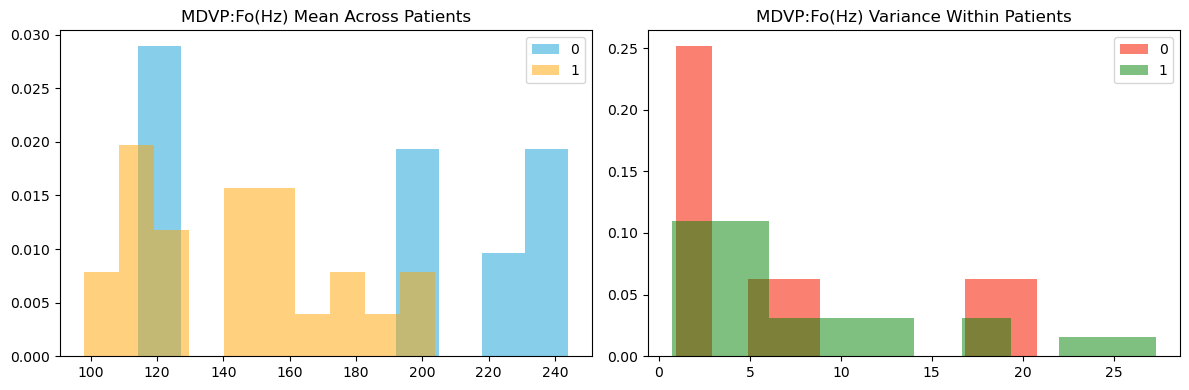

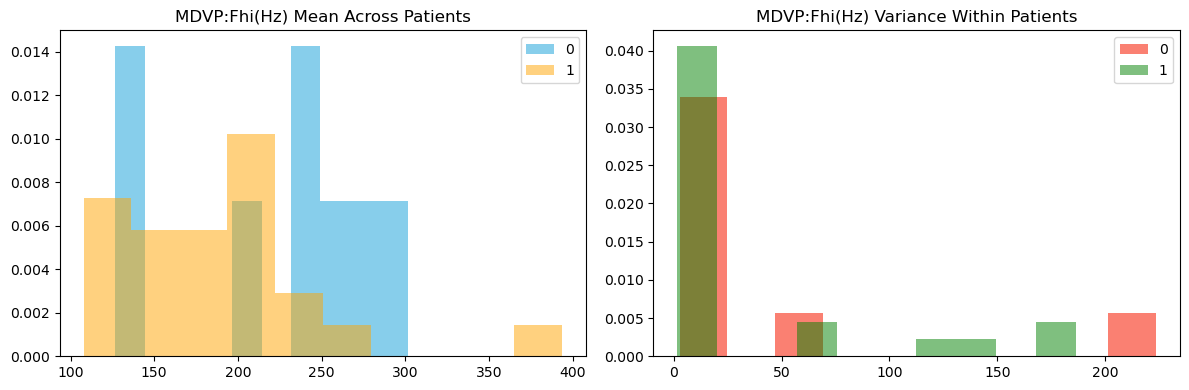

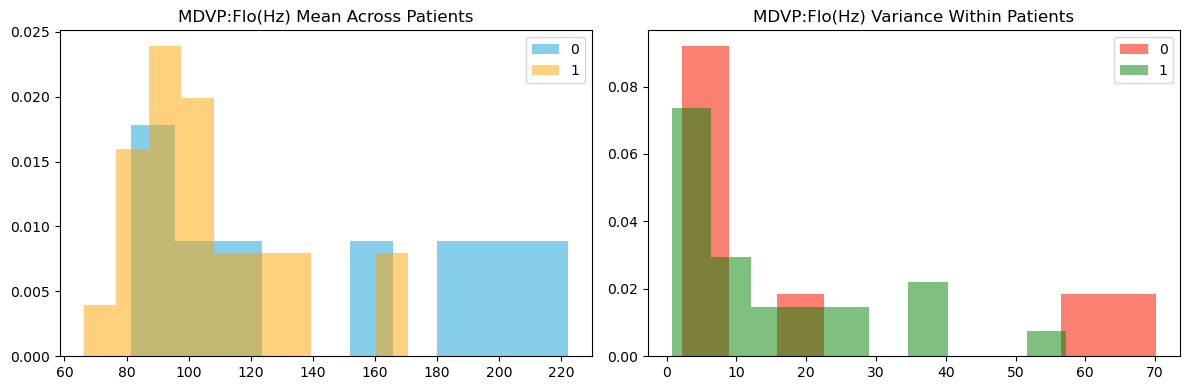

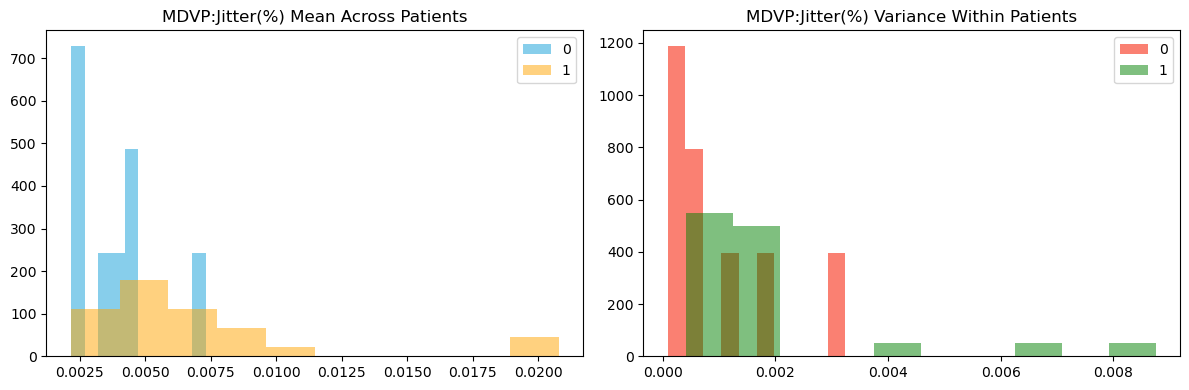

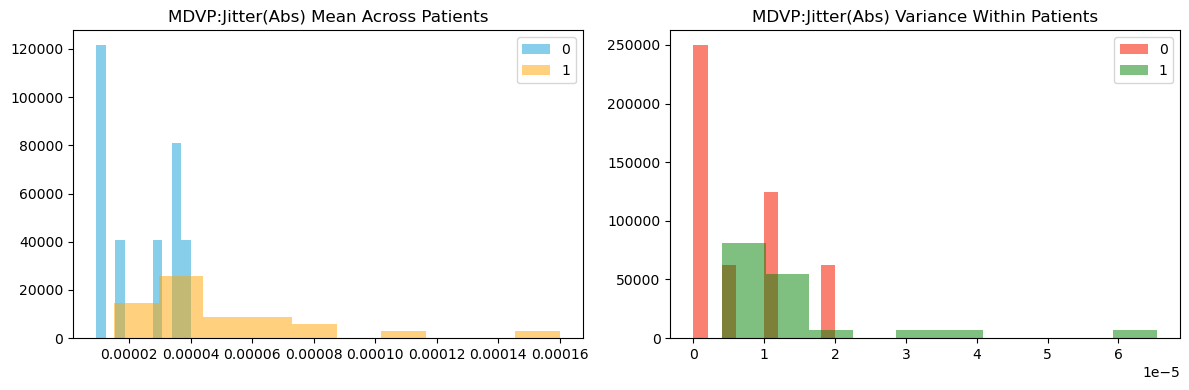

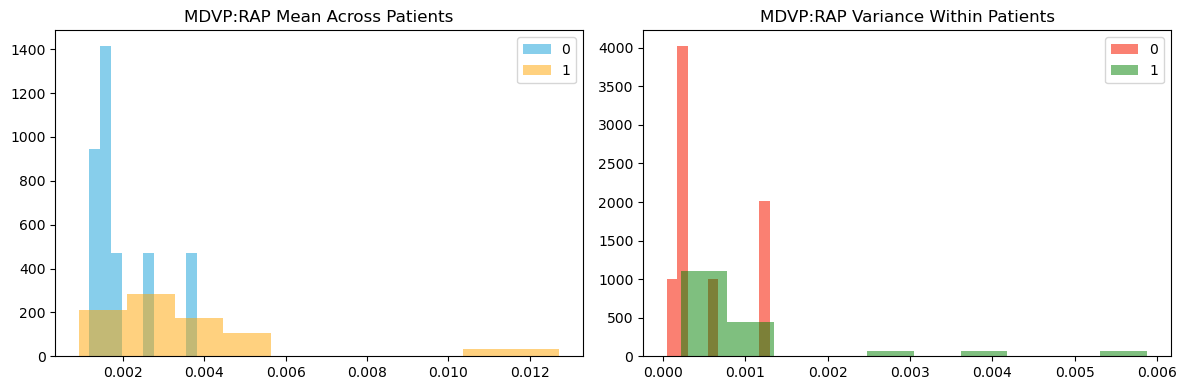

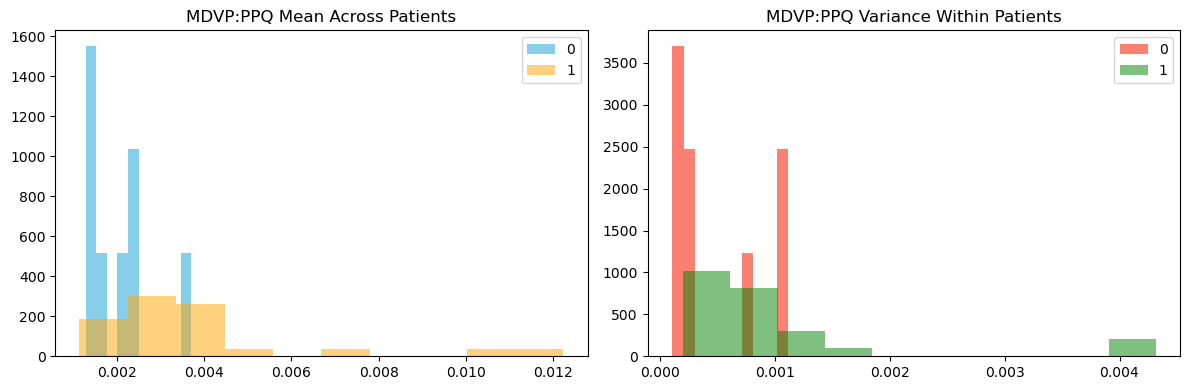

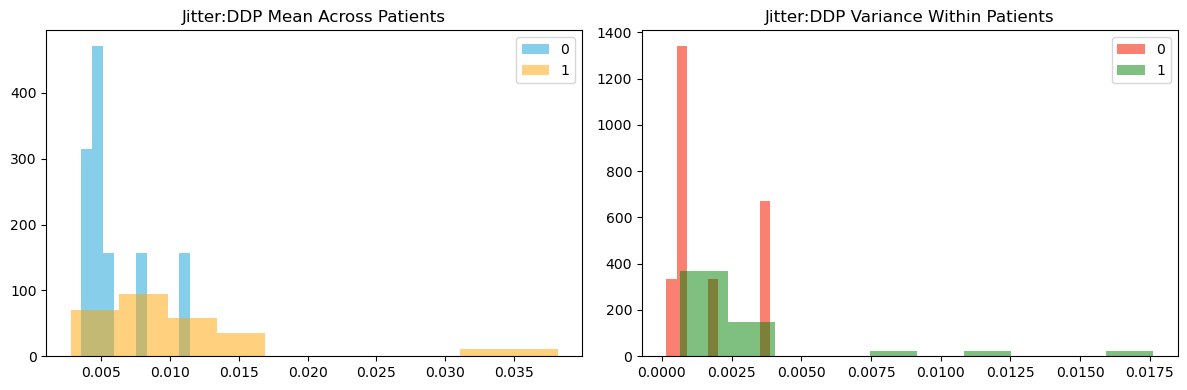

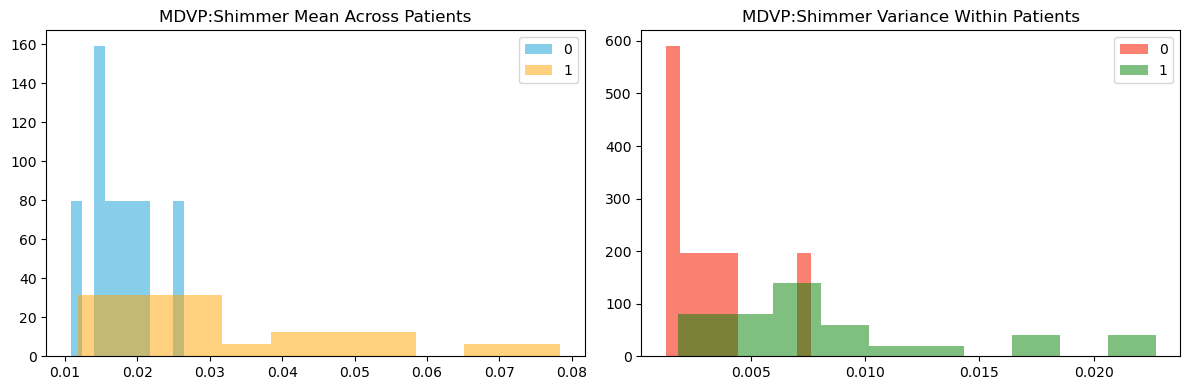

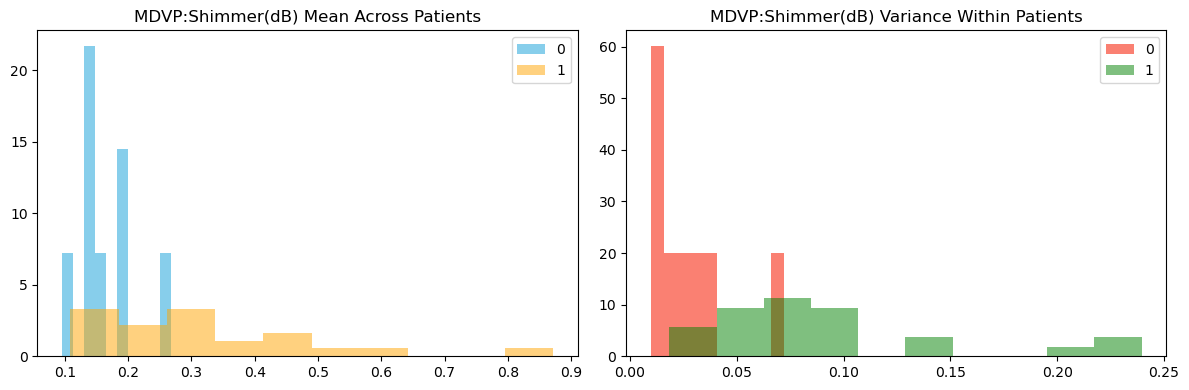

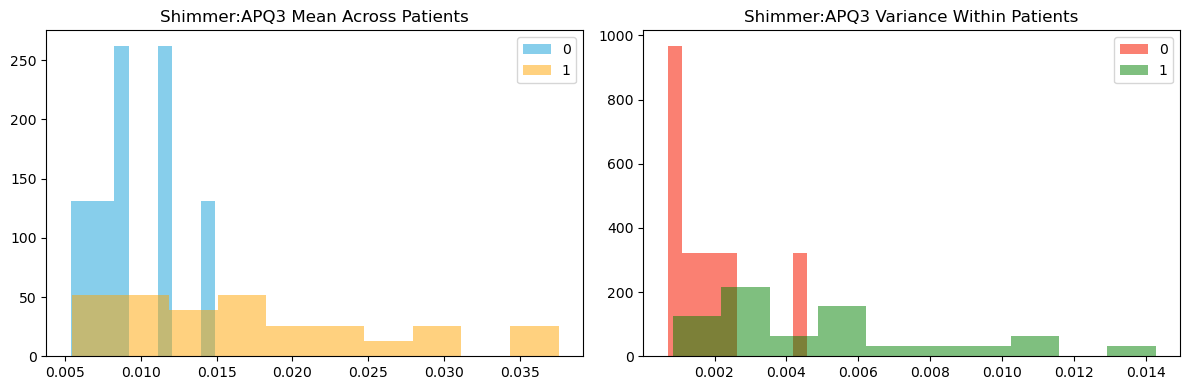

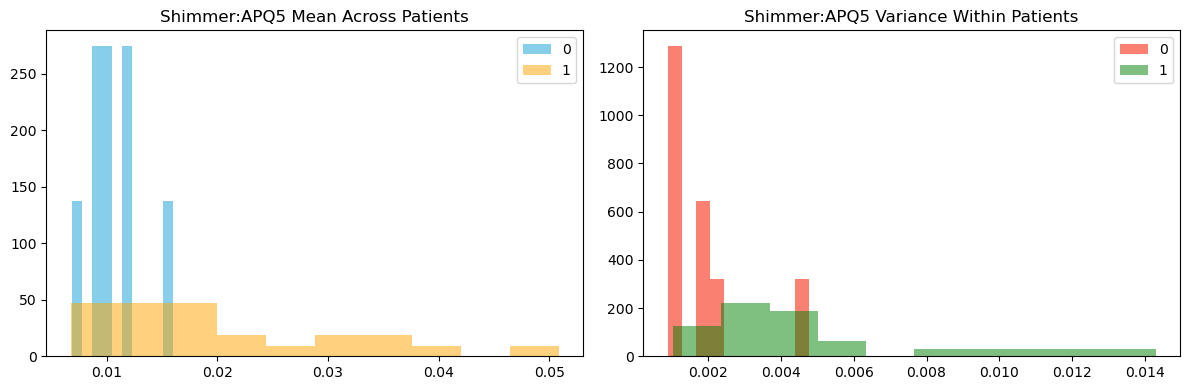

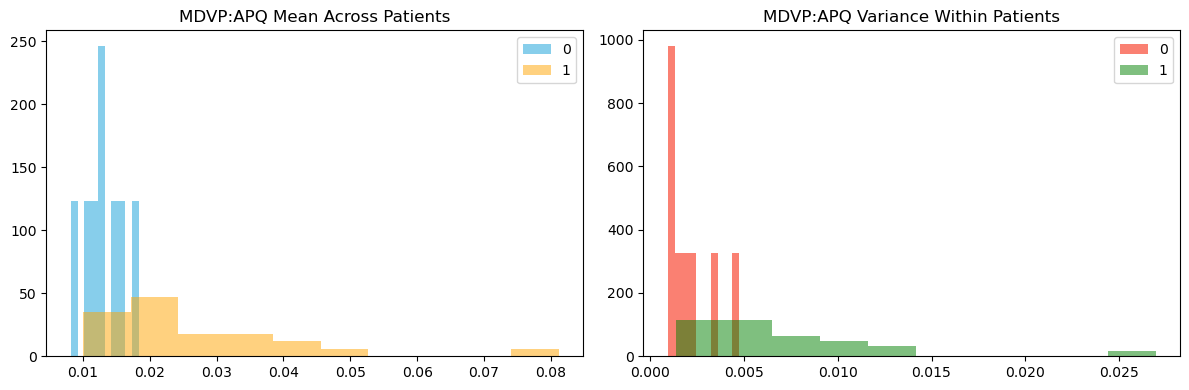

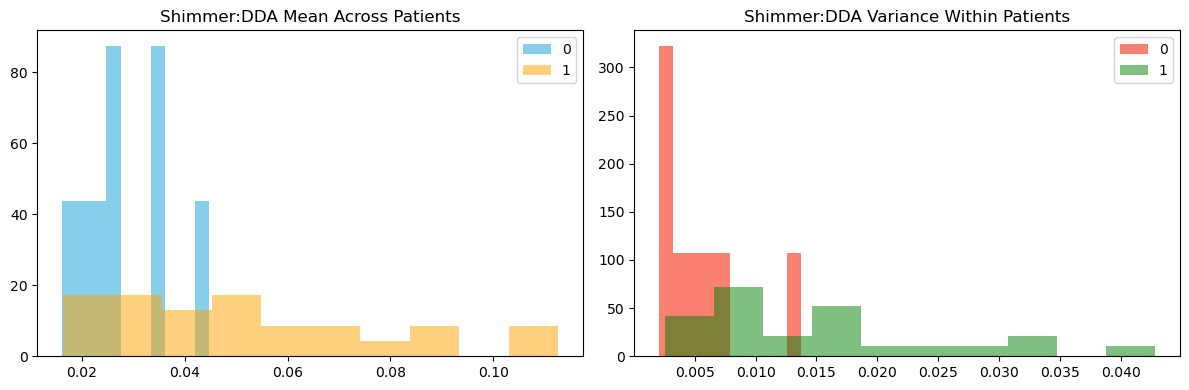

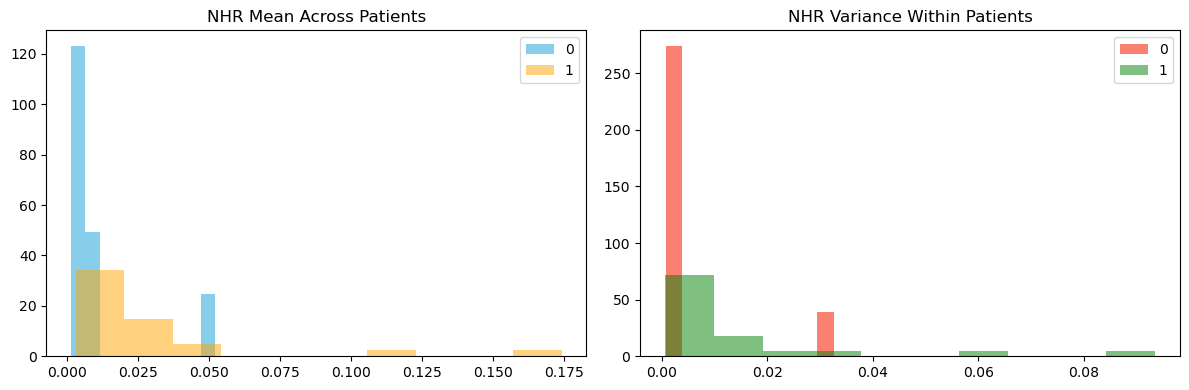

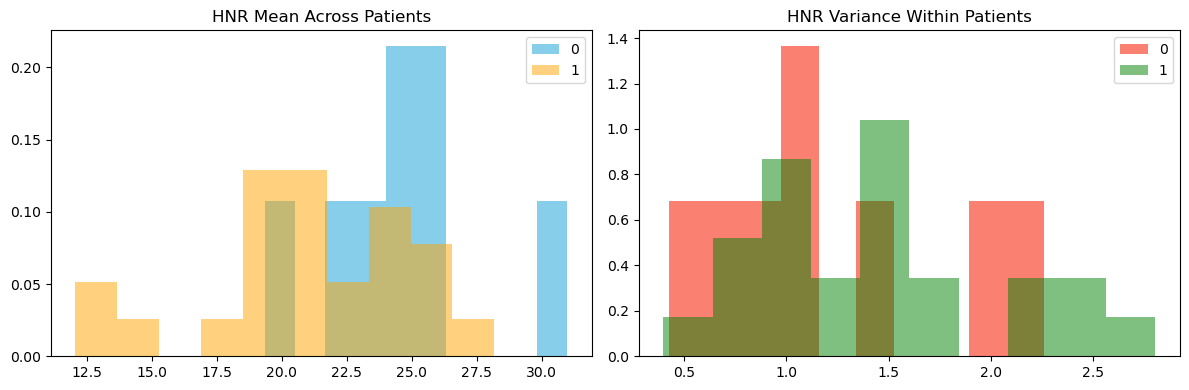

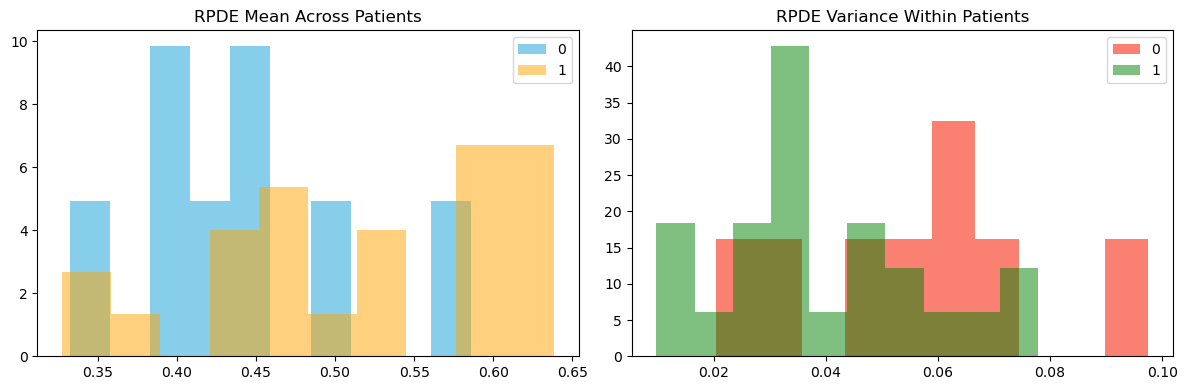

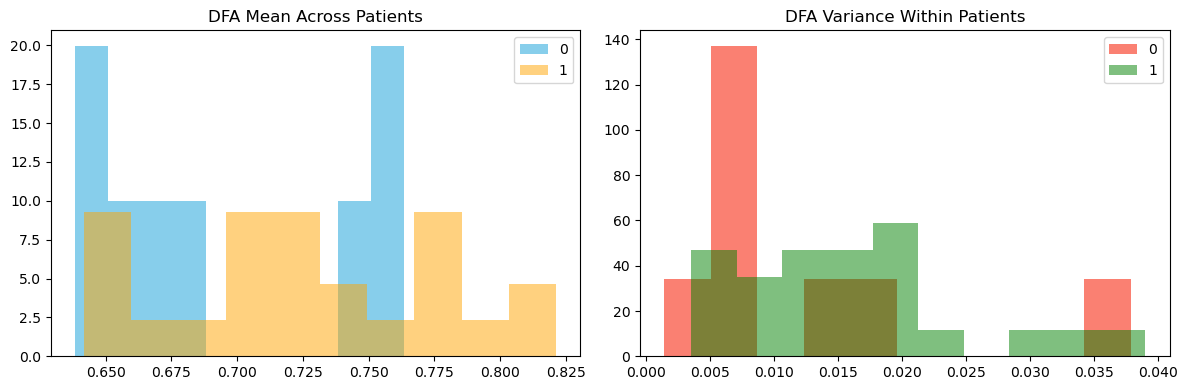

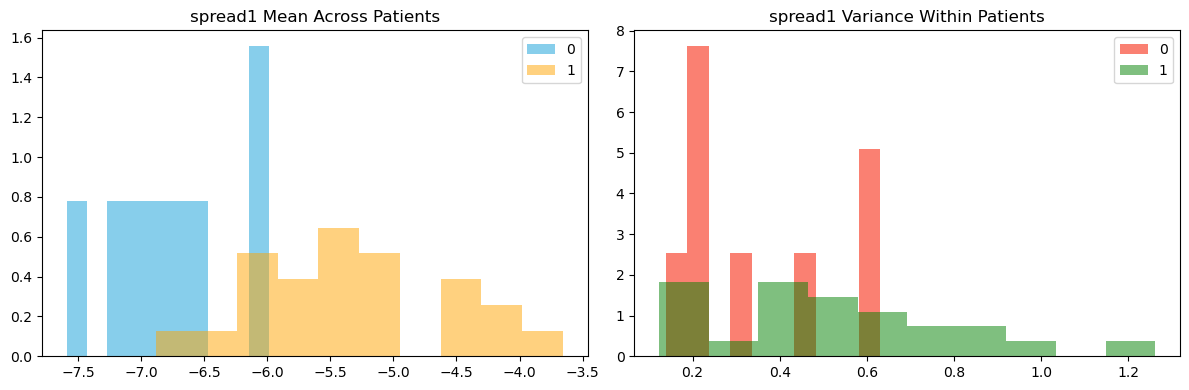

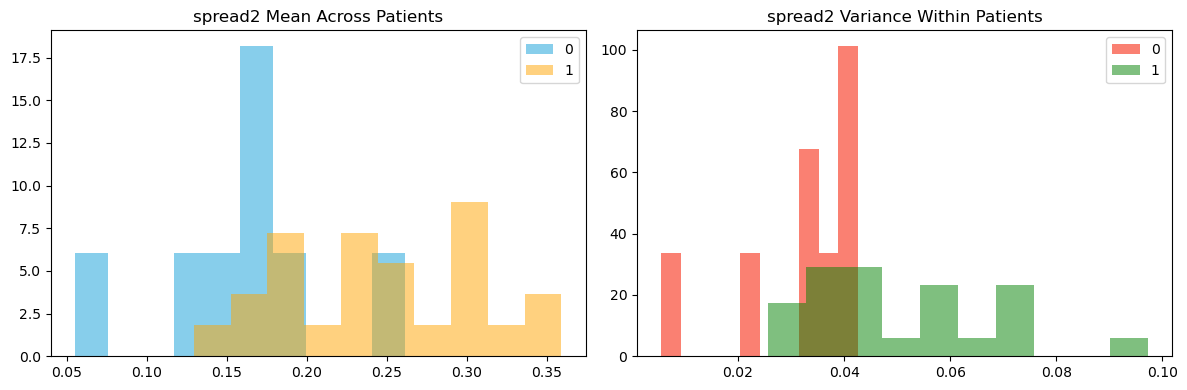

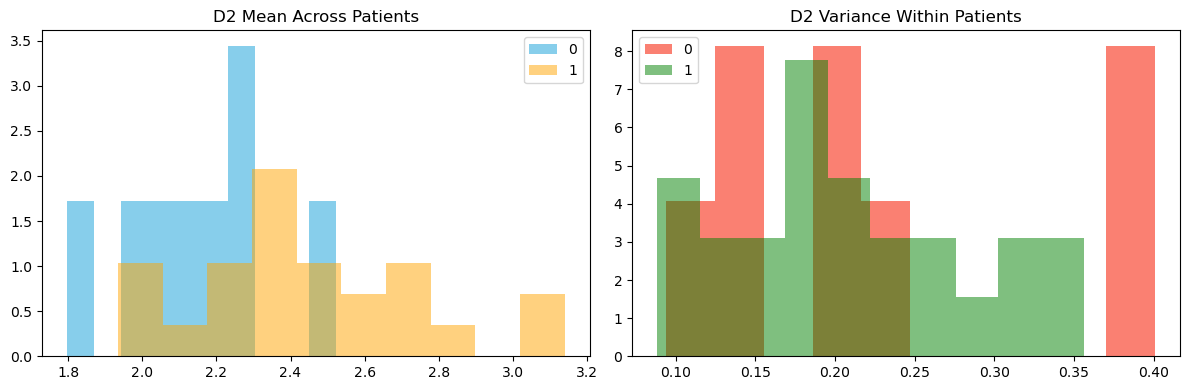

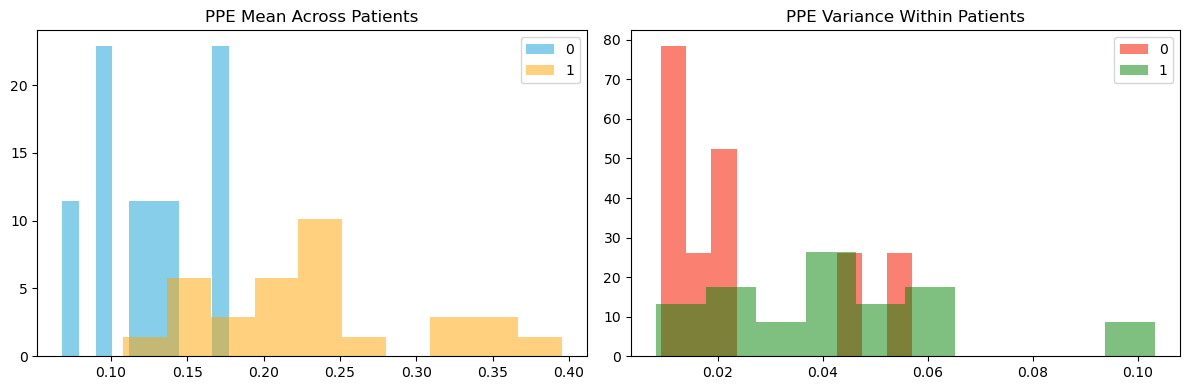

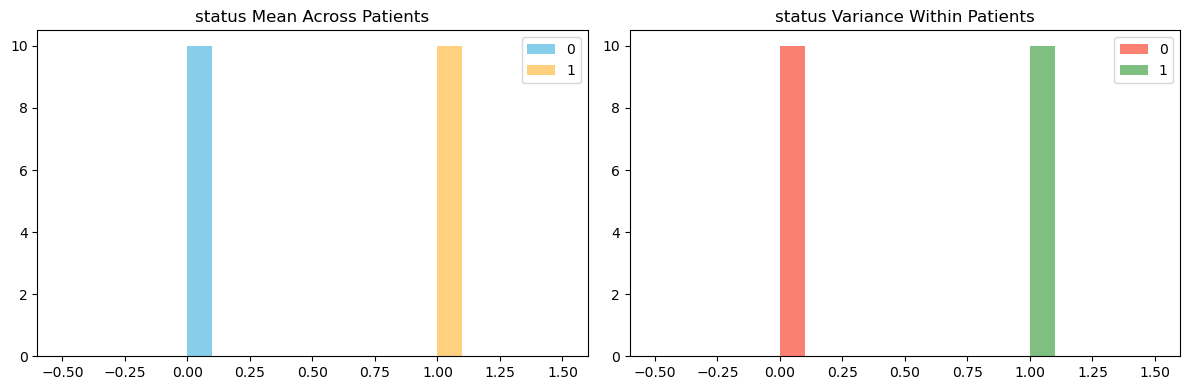

In [16]:
for col in num_cols:
    plt.figure(figsize=(12, 4))

    # Mean
    plt.subplot(1, 2, 1)
    
    plt.hist(patient_mean_df[patient_mean_df["status"]==0][col], color="skyblue", label="0", density = 1, stacked=True)
    plt.hist(patient_mean_df[patient_mean_df["status"]==1][col], color="orange",alpha=0.5,label="1", density=1, stacked=True)

    plt.title(f'{col} Mean Across Patients')
    plt.legend()

    # Variance
    plt.subplot(1, 2, 2)

    plt.hist(patient_var_df[patient_mean_df["status"]==0][col], color="salmon",label="0", density=1, stacked=True)
    plt.hist(patient_var_df[patient_mean_df["status"]==1][col], color="green",alpha=0.5,label="1", density=1, stacked=True)
    
    plt.title(f'{col} Variance Within Patients')

    plt.tight_layout()
    plt.legend()
    plt.show()

In [17]:
def patient(num,full_id=None):
    num = str(num)
    if len(num) == 1:
        num = f"0{num}"
    id = "phon_R01_S"
    if full_id != None:
        patient = full_id
    else:
        patient = f"{id}{num}"
    status = list(df[df["ID"]==patient]["status"].unique())[0]
    if status==0:
        print("No PD")
    else:
        print("Yes PD")

In [18]:
patient(42)

No PD


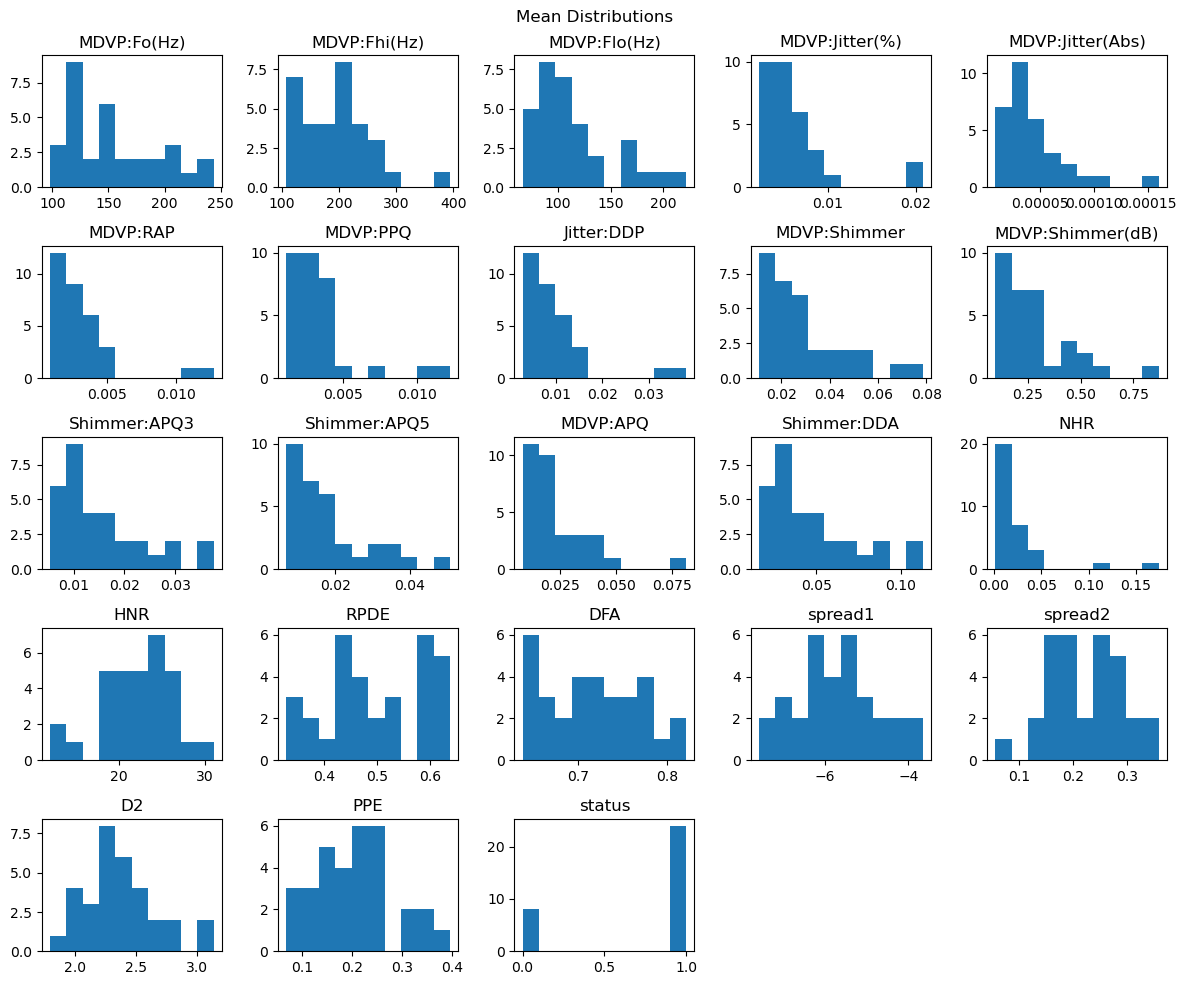

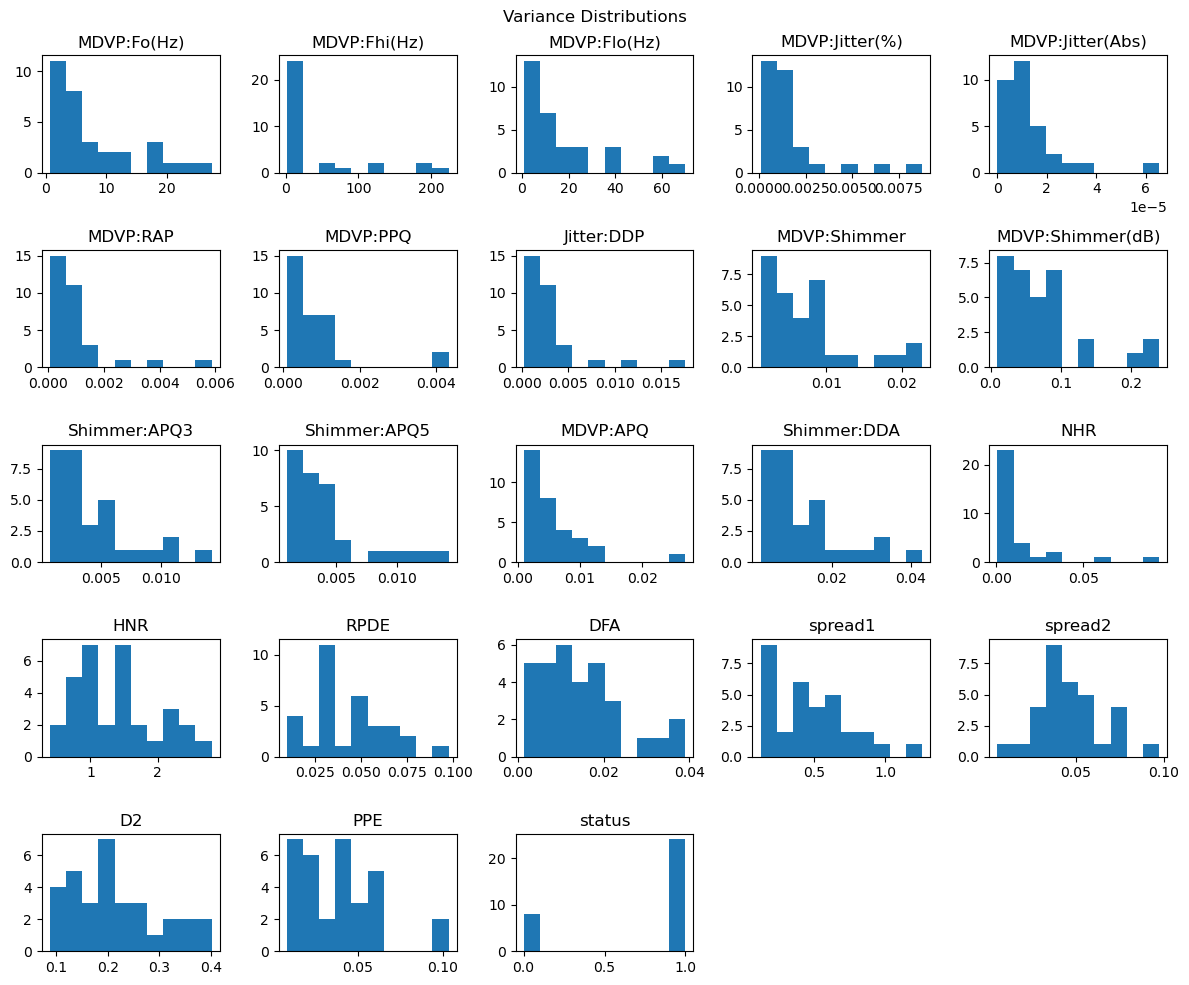

In [19]:
patient_mean_df.hist(grid=False,figsize=(12,10))
plt.suptitle("Mean Distributions")
plt.tight_layout()
plt.show()

patient_var_df.hist(grid=False,figsize=(12,10))
plt.suptitle("Variance Distributions")
plt.tight_layout()
plt.show()

In [20]:
patient_mean_df["status"].value_counts()

status
1.0    24
0.0     8
Name: count, dtype: int64

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()
means_df = scaler.fit_transform(patient_mean_df)
means_df = pd.DataFrame(means_df, columns = patient_mean_df.columns, index = patient_ids)

In [23]:
means_df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
phon_R01_S01,0.142457,0.117286,0.255297,0.425876,0.513812,0.345393,0.556416,0.345190,0.637715,0.540958,...,0.703791,0.085869,0.440822,0.324800,1.000000,0.851867,0.794608,0.406677,0.873702,1.0
phon_R01_S02,0.012559,0.049412,0.187190,0.130812,0.270718,0.118711,0.155202,0.118675,0.160655,0.127234,...,0.175900,0.042993,0.577673,0.871492,0.763485,0.551647,0.832268,0.365623,0.507309,1.0
phon_R01_S04,0.338697,0.381372,0.136633,0.118026,0.138122,0.070803,0.106870,0.070809,0.126276,0.110900,...,0.124335,0.067110,0.625339,0.624530,0.041471,0.572790,0.638266,0.420058,0.501156,1.0
phon_R01_S05,0.424328,0.258207,0.131724,0.219957,0.204420,0.181176,0.206085,0.181146,0.481052,0.377188,...,0.469660,0.139685,0.369614,0.962511,0.314833,0.770226,0.734260,0.737726,0.741655,1.0
phon_R01_S06,0.361309,0.351302,0.077267,0.165415,0.182320,0.152629,0.153551,0.152455,0.156194,0.147006,...,0.133402,0.077605,0.670892,0.338426,0.444786,0.347399,0.569241,0.479335,0.296074,1.0
phon_R01_S07,0.701476,0.360459,0.821987,0.000894,0.003315,0.021198,0.013359,0.021012,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.218932,0.563911,0.000000,0.387581,0.000000,0.000000,0.0
phon_R01_S08,0.576477,0.308643,0.670603,0.057940,0.060773,0.071085,0.067394,0.071139,0.087733,0.071354,...,0.100159,0.009780,0.722995,0.091173,0.712244,0.306494,0.453238,0.449469,0.244252,1.0
phon_R01_S10,1.000000,0.512142,1.000000,0.013054,0.000000,0.030526,0.031821,0.030246,0.066613,0.053301,...,0.101264,0.022747,0.663109,0.399473,0.000000,0.123084,0.245549,0.373829,0.092581,0.0
phon_R01_S13,0.189257,0.092820,0.325023,0.131348,0.171271,0.044093,0.054486,0.043956,0.143527,0.116702,...,0.189542,0.022418,0.669545,0.586523,0.679582,0.227482,0.677932,0.226560,0.168390,0.0
phon_R01_S16,0.103346,0.162335,0.252877,0.316345,0.414365,0.219050,0.351381,0.218977,0.279069,0.248879,...,0.334860,0.047289,0.509996,0.691533,0.975364,0.780819,0.607698,0.102923,0.787362,1.0


In [24]:
scaler = MinMaxScaler()
vars_df = scaler.fit_transform(patient_var_df)
vars_df = pd.DataFrame(vars_df, columns = patient_var_df.columns, index = patient_ids)
vars_df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
phon_R01_S01,0.071759,0.038907,0.209114,0.176914,0.208839,0.154615,0.252308,0.155044,0.311739,0.292523,...,0.310999,0.036961,0.195554,0.079998,0.067285,0.209542,0.373247,0.039318,0.357235,1.0
phon_R01_S02,0.420725,0.039257,0.159512,0.123273,0.236801,0.103652,0.148800,0.103805,0.193458,0.182131,...,0.156854,0.030387,0.808744,0.243186,0.349480,0.288177,0.765275,0.621878,0.355842,1.0
phon_R01_S04,0.418576,0.313118,0.302035,0.181807,0.136717,0.098804,0.193847,0.098681,0.282711,0.332421,...,0.162403,0.092770,0.701884,0.775957,0.526752,1.000000,1.000000,0.856800,1.000000,1.0
phon_R01_S05,0.306587,0.045166,0.399301,0.194363,0.167444,0.149568,0.200331,0.149564,0.224069,0.294553,...,0.177859,0.105759,0.721804,0.427587,0.350368,0.374395,0.574307,0.414905,0.471433,1.0
phon_R01_S06,0.878645,0.038716,0.021665,0.161920,0.230129,0.117980,0.173666,0.118165,0.317021,0.328305,...,0.228368,0.077158,0.475051,0.541711,0.550418,0.425780,0.254030,0.767517,0.383076,1.0


## Modelling

In [26]:
dt = DecisionTreeClassifier(class_weight="balanced", max_depth=5)

In [27]:
df = means_df.copy()

In [28]:
df.shape

(32, 23)

In [29]:
pd.DataFrame(df.loc["phon_R01_S01"]).T

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
phon_R01_S01,0.142457,0.117286,0.255297,0.425876,0.513812,0.345393,0.556416,0.34519,0.637715,0.540958,...,0.703791,0.085869,0.440822,0.3248,1.0,0.851867,0.794608,0.406677,0.873702,1.0


In [30]:
metrics = list()

In [31]:
df = means_df

x = df[num_cols[:-1]]
y = df["status"] #target variable

correct=0
incorrect=0
for id in patient_ids:
    x_train = x.drop(labels=id,axis=0)
    y_train = y.drop(labels=id,axis=0)
    
    x_test = pd.DataFrame(x.loc[id]).T
    y_test = y[id]

    #training
    dt.fit(x_train,y_train)
    y_hat = dt.predict(x_test)

    if y_hat == y_test:
        correct+=1
    else:
        incorrect+=1
        
metrics.append({"Mean_DT": correct/(correct+incorrect)})

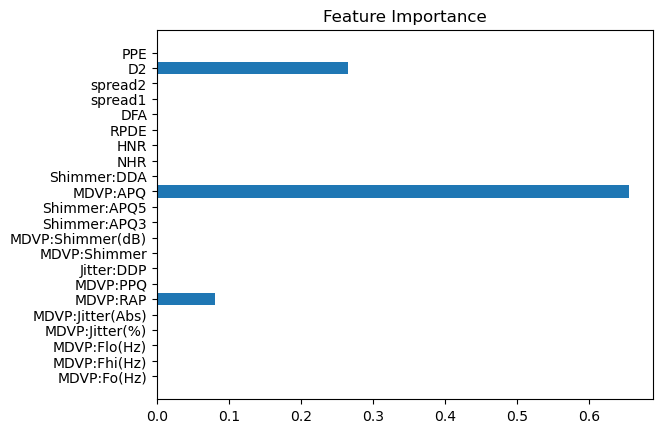

In [32]:
importances = dt.feature_importances_
feat_names = num_cols[:-1]
plt.barh(feat_names, importances)
plt.title("Feature Importance")
plt.show()


In [33]:
df = vars_df

x = df[num_cols[:-1]]
y = df["status"] #target variable

correct=0
incorrect=0
for id in patient_ids:
    x_train = x.drop(labels=id,axis=0)
    y_train = y.drop(labels=id,axis=0)
    
    x_test = pd.DataFrame(x.loc[id]).T
    y_test = y[id]

    #training
    dt.fit(x_train,y_train)
    y_hat = dt.predict(x_test)

    if y_hat == y_test:
        correct+=1
    else:
        incorrect+=1
        
metrics.append({"Vars_DT": correct/(correct+incorrect)})

In [34]:
metrics

[{'Mean_DT': 0.59375}, {'Vars_DT': 0.71875}]

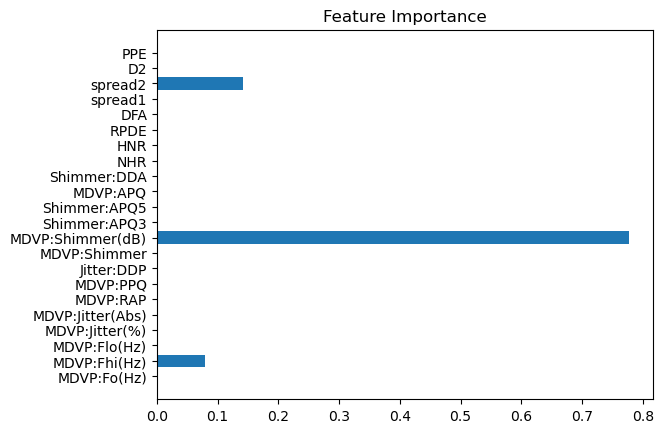

In [35]:
importances = dt.feature_importances_
feat_names = num_cols[:-1]
plt.barh(feat_names, importances)
plt.title("Feature Importance")
plt.show()

In [36]:
selected_df = pd.concat([vars_df[["spread2","MDVP:Shimmer(dB)","MDVP:Fo(Hz)"]],means_df[["D2","MDVP:APQ","Jitter:DDP","status"]]],axis=1)
selected_df

,spread2,MDVP:Shimmer(dB),MDVP:Fo(Hz),D2,MDVP:APQ,Jitter:DDP,status
phon_R01_S01,0.373247,0.292523,0.071759,0.406677,0.399599,0.345190,1.0
phon_R01_S02,0.765275,0.182131,0.420725,0.365623,0.136086,0.118675,1.0
phon_R01_S04,1.000000,0.332421,0.418576,0.420058,0.140015,0.070809,1.0
phon_R01_S05,0.574307,0.294553,0.306587,0.737726,0.497055,0.181146,1.0
phon_R01_S06,0.254030,0.328305,0.878645,0.479335,0.171746,0.152455,1.0
phon_R01_S07,0.000000,0.007057,0.063633,0.000000,0.000000,0.021012,0.0
phon_R01_S08,0.684417,0.059964,0.148672,0.449469,0.073309,0.071139,1.0
phon_R01_S10,0.403797,0.051649,0.163486,0.373829,0.034792,0.030246,0.0
phon_R01_S13,0.196097,0.100040,0.080049,0.226560,0.110545,0.043956,0.0
phon_R01_S16,0.279903,0.174803,0.114948,0.102923,0.205831,0.218977,1.0


In [38]:
df = means_df

x = df[df.columns[:-1]]
y = df["status"] #target variable

dt = DecisionTreeClassifier(class_weight="balanced")

correct=0
incorrect=0
for id in patient_ids:
    x_train = x.drop(labels=id,axis=0)
    y_train = y.drop(labels=id,axis=0)
    
    x_test = pd.DataFrame(x.loc[id]).T
    y_test = y[id]

    #training
    dt.fit(x_train,y_train)
    y_hat = dt.predict(x_test)

    if y_hat == y_test:
        correct+=1
    else:
        incorrect+=1
        
metrics.append({"Mean_DT_unpruned": correct/(correct+incorrect)})

In [39]:
df = vars_df

x = df[df.columns[:-1]]
y = df["status"] #target variable

dt = DecisionTreeClassifier(class_weight="balanced")

correct=0
incorrect=0
for id in patient_ids:
    x_train = x.drop(labels=id,axis=0)
    y_train = y.drop(labels=id,axis=0)
    
    x_test = pd.DataFrame(x.loc[id]).T
    y_test = y[id]

    #training
    dt.fit(x_train,y_train)
    y_hat = dt.predict(x_test)

    if y_hat == y_test:
        correct+=1
    else:
        incorrect+=1
        
metrics.append({"Vars_DT_unpruned": correct/(correct+incorrect)})

In [40]:
df = selected_df

x = df[df.columns[:-1]]
y = df["status"] #target variable

dt = DecisionTreeClassifier(class_weight="balanced")

correct=0
incorrect=0
for id in patient_ids:
    x_train = x.drop(labels=id,axis=0)
    y_train = y.drop(labels=id,axis=0)
    
    x_test = pd.DataFrame(x.loc[id]).T
    y_test = y[id]

    #training
    dt.fit(x_train,y_train)
    y_hat = dt.predict(x_test)

    if y_hat == y_test:
        correct+=1
    else:
        incorrect+=1
        
metrics.append({"Combo_DT_unpruned": correct/(correct+incorrect)})

In [41]:
df = means_df

x = df[df.columns[:-1]]
y = df["status"] #target variable

dt = RandomForestClassifier(class_weight="balanced")

correct=0
incorrect=0
for id in patient_ids:
    x_train = x.drop(labels=id,axis=0)
    y_train = y.drop(labels=id,axis=0)
    
    x_test = pd.DataFrame(x.loc[id]).T
    y_test = y[id]

    #training
    dt.fit(x_train,y_train)
    y_hat = dt.predict(x_test)

    if y_hat == y_test:
        correct+=1
    else:
        incorrect+=1
        
metrics.append({"Mean_RF_unpruned": correct/(correct+incorrect)})

In [42]:
df = vars_df

x = df[df.columns[:-1]]
y = df["status"] #target variable

dt = RandomForestClassifier(class_weight="balanced")

correct=0
incorrect=0
for id in patient_ids:
    x_train = x.drop(labels=id,axis=0)
    y_train = y.drop(labels=id,axis=0)
    
    x_test = pd.DataFrame(x.loc[id]).T
    y_test = y[id]

    #training
    dt.fit(x_train,y_train)
    y_hat = dt.predict(x_test)

    if y_hat == y_test:
        correct+=1
    else:
        incorrect+=1
        
metrics.append({"Vars_RF_unpruned": correct/(correct+incorrect)})

In [43]:
df = selected_df

x = df[df.columns[:-1]]
y = df["status"] #target variable

dt = RandomForestClassifier(class_weight="balanced")

correct=0
incorrect=0
for id in patient_ids:
    x_train = x.drop(labels=id,axis=0)
    y_train = y.drop(labels=id,axis=0)
    
    x_test = pd.DataFrame(x.loc[id]).T
    y_test = y[id]

    #training
    dt.fit(x_train,y_train)
    y_hat = dt.predict(x_test)

    if y_hat == y_test:
        correct+=1
    else:
        incorrect+=1
        
metrics.append({"Combo_RF_unpruned": correct/(correct+incorrect)})

In [44]:
metrics

[{'Mean_DT': 0.59375},
 {'Vars_DT': 0.71875},
 {'Mean_DT_unpruned': 0.65625},
 {'Vars_DT_unpruned': 0.75},
 {'Combo_DT_unpruned': 0.71875},
 {'Mean_RF_unpruned': 0.75},
 {'Vars_RF_unpruned': 0.75},
 {'Combo_RF_unpruned': 0.84375}]

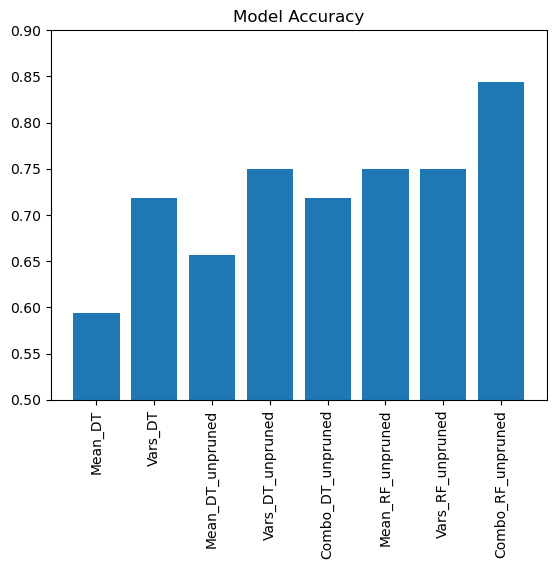

In [45]:
metrics_models = list()
metrics_accuracy = list()
for x in metrics:
    
        model = list(x)[0]
        accuracy = x[model]
        metrics_models.append(model)
        metrics_accuracy.append(accuracy)
         
plt.bar(metrics_models,metrics_accuracy)
plt.title("Model Accuracy")
plt.ylim(0.5,0.9)
plt.xticks(rotation=90)
plt.show()